In [62]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [63]:
#importing dataset
airline=pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name='data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [64]:
airline = airline.rename({'ID#':'ID','Award?':'Award'}, axis = 1)
airline.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [65]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [66]:
def check_int(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [67]:
check_int(airline[airline.columns])

In [68]:
airline.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [69]:
airline.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


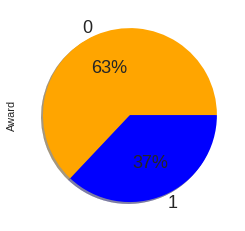

In [70]:
airline['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', colors = ['Orange','Blue'], shadow =True)
plt.show()

**Only** **37**% **of** **the** **people** **got** **free** **flight** **award**

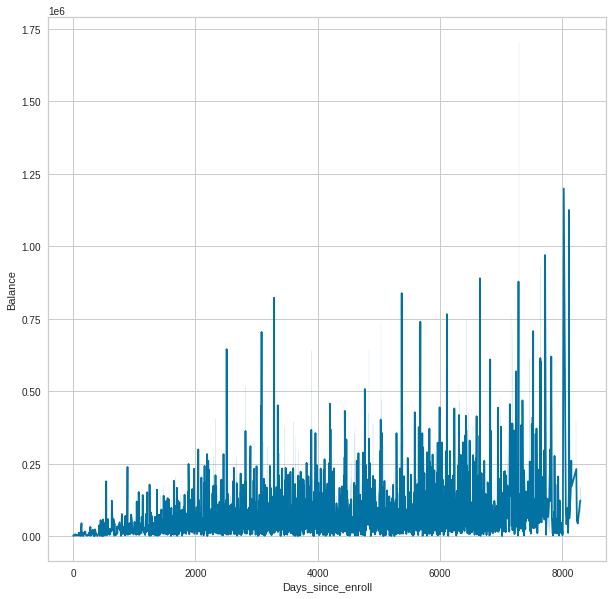

In [71]:
fig, ax =plt.subplots(figsize=(10,10))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = airline)

**So people who have enrolled in flier program long time ago and had travelled more no.of miles has the high chance of getting rewarded(free flight)**

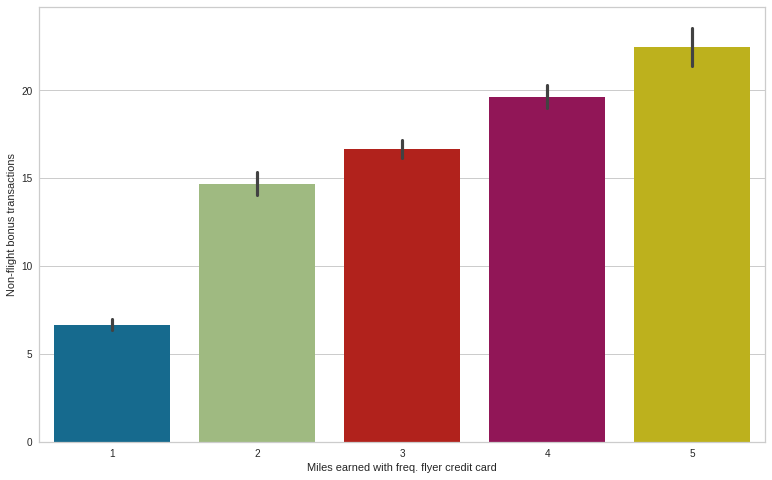

In [72]:
#Bar plot
plt.figure(figsize = (13,8))
Bar_plt = airline[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = True)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= Bar_plt)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.show()

**More no.of the frequent fliers have used bonus transactions more**

<AxesSubplot:>

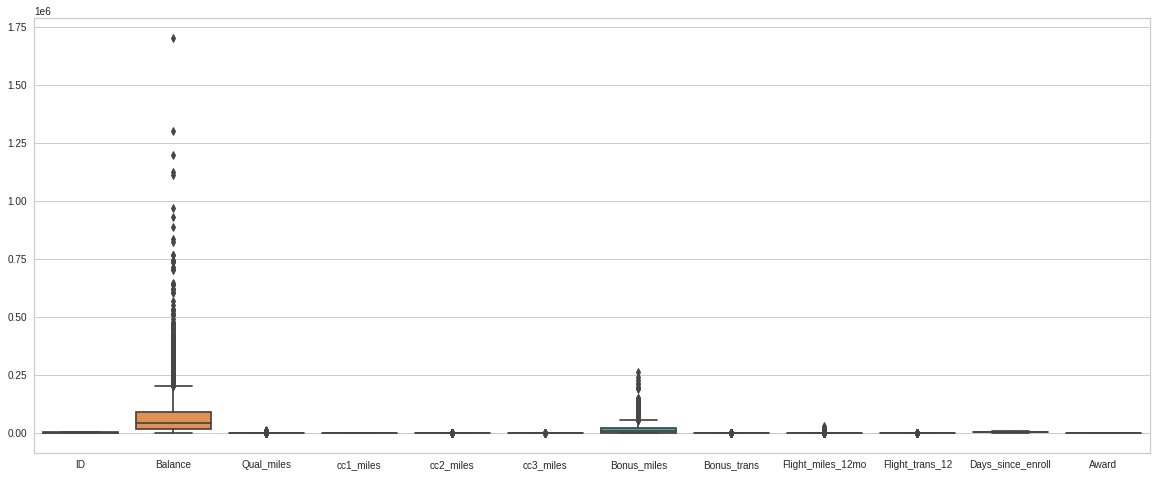

In [73]:
#Box Plot
plt.figure(figsize=(20,8))
sns.boxplot(data=airline)

**As we can see there are more no of outliers in Balance ****, **Bonus_miles ,Flight miles 12 mo and qual miles** **so we have to remove it** 

In [74]:
# removing the outliers from Balance,Bonus_miles,Flight_miles_mo & Qual_miles one by one
q1 = airline['Balance'].quantile(0.25)
q3 = airline['Balance'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
airline1 = airline[(airline['Balance']>ll)&(airline['Balance']<ul)]
airline.head(50)



,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [75]:
airline1.head(50)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1
10,11,40091,0,2,1,1,7278,10,0,0,6959,0



**If we compare airline(original) with airline1(Outlier removed) we can say by looking at the values that removing outliers have worked so well we can visualize it with the help of below given plot**

<AxesSubplot:>

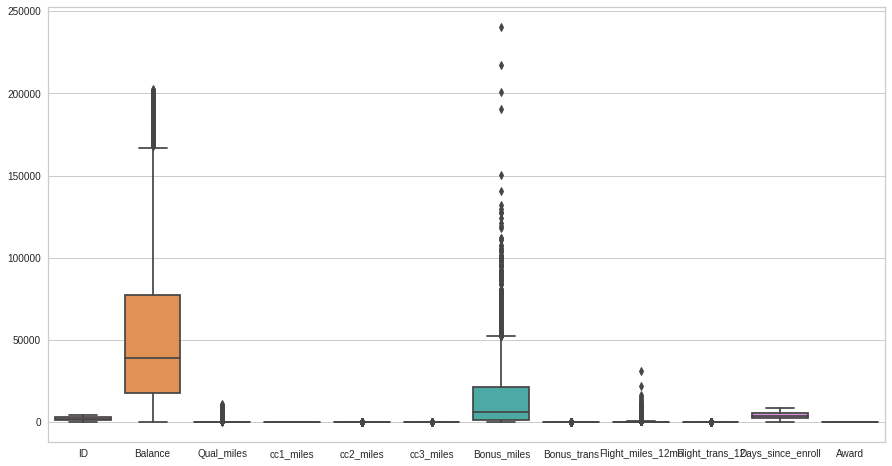

In [76]:
plt.figure(figsize=(15,8))
sns.boxplot(data=airline1)

In [77]:
airline_shape = airline.shape

airline1_shape = airline1.shape

print("shape of original data:", airline_shape, "\n")
print("shape of new data:", airline1_shape)

shape of original data: (3999, 12) 

shape of new data: (3733, 12)


**Furthermore we are going to remove outliers same way we have done for the balance along with their visualizations**

<AxesSubplot:>

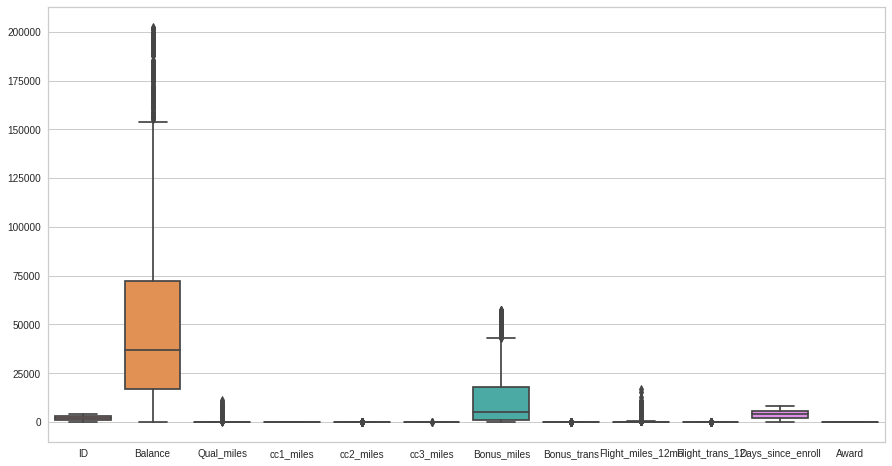

In [78]:
#removing outliers from Bonus_miles:

q1 = airline['Bonus_miles'].quantile(0.25)
q3 = airline['Bonus_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
airline2 = airline1[(airline1['Bonus_miles']>ll)&(airline1['Bonus_miles']<ul)]
plt.figure(figsize=(15,8))
sns.boxplot(data=airline2)

<AxesSubplot:>

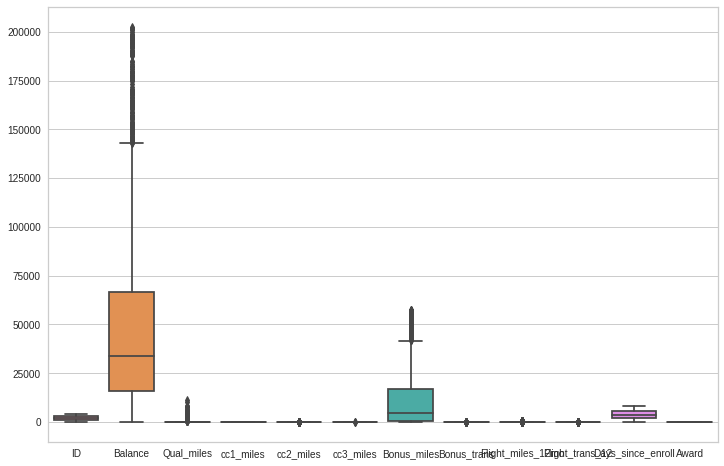

In [79]:
# Removing outliers from Flight_miles_12mo

q1 = airline['Flight_miles_12mo'].quantile(0.25)
q3 = airline['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
airline3 = airline2[(airline2['Flight_miles_12mo']>ll)&(airline2['Flight_miles_12mo']<ul)]
plt.figure(figsize=(12,8))
sns.boxplot(data=airline3)

<AxesSubplot:>

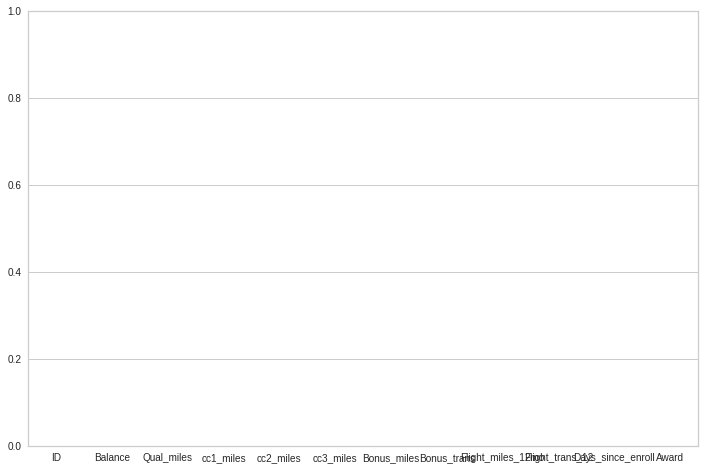

In [80]:
# Removing outliers from Qual_miles
q1 = airline['Qual_miles'].quantile(0.25)
q3 = airline['Qual_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
airline4 = airline3[(airline3['Qual_miles']>ll)&(airline3['Qual_miles']<ul)]
plt.figure(figsize=(12,8))
sns.boxplot(data=airline4)

In [81]:
airline3.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


In [82]:
#dropping id and award cloumns as they will not going to be used for cluster making
airline_final =  airline3.drop(['ID','Award'], axis=1)
airline_final.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942


<AxesSubplot:>

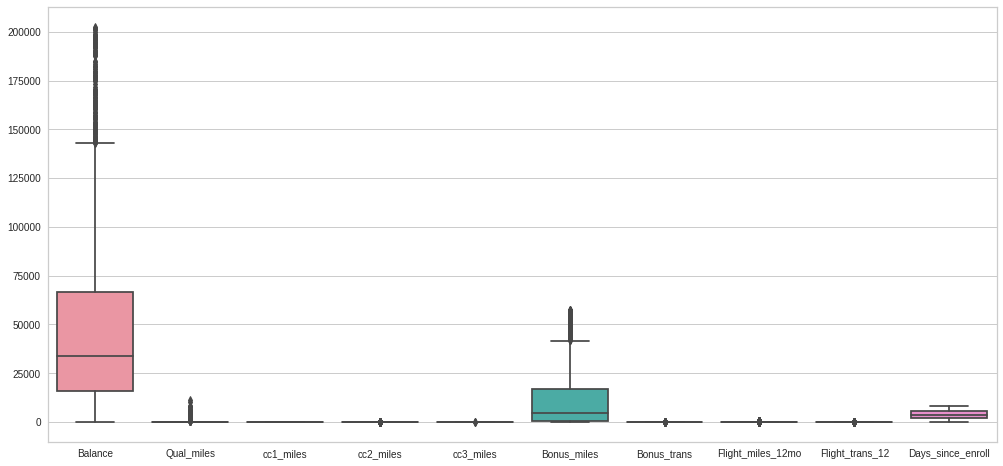

In [83]:
plt.figure(figsize=(17,8))
sns.boxplot(data=airline_final)

In [84]:
#Normalization
standard_scaler = StandardScaler()
airline_norm = standard_scaler.fit_transform(airline_final)
airline_norm.shape

(3105, 10)

In [85]:
cluster_range = range(1,17)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(airline_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_airline = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})

In [86]:
clusters_airline[0:19]

,num_clusters,cluster_errors
0,1,31050.000000
1,2,24457.289206
2,3,20678.263821
3,4,17960.615131
4,5,15417.673057
5,6,14056.533875
6,7,11992.457539
7,8,10957.696927
8,9,10168.008431
9,10,9321.161587


**Using Elbow Method for determinig No.Of Clusters**

Text(0, 0.5, 'Cluster Errors')

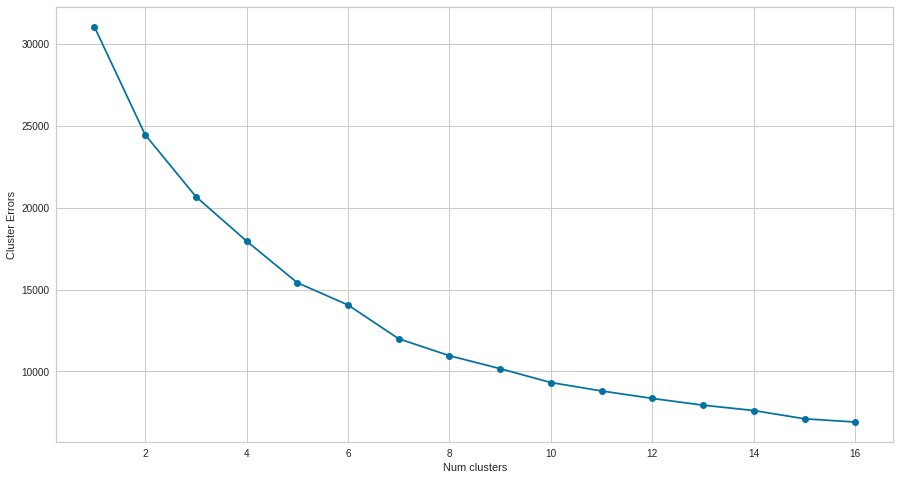

In [87]:
plt.figure(figsize=(15,8))
plt.plot(clusters_airline['num_clusters'],clusters_airline['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

**From this elbow plot we can identify the optimal no.of clusters** 
**After X=6 values are decreasing gradually**
**So we can take no.of Clusters as 6 **

**Using PCA on Normalized Data**

In [88]:
#PCA
from sklearn.decomposition import PCA

pca_std = PCA(random_state=10, n_components=0.95)
pca_std_airline = pca_std.fit_transform(airline_norm)

In [89]:
# eigenvalues
print(pca_std.singular_values_)

[93.47111964 74.7912179  56.44863914 55.83228315 55.63692717 55.0128613
 44.8698796  37.59849223]


In [90]:
#  variance contained in each formed PCA
print(pca_std.explained_variance_ratio_*100)

[28.13800389 18.0152215  10.26231517 10.03943266  9.96930005  9.74690792
  6.4840776   4.55280714]


In [91]:
# Cummulative variance ratio
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([28.13800389, 46.15322539, 56.41554056, 66.45497322, 76.42427326,
       86.17118118, 92.65525878, 97.20806592])

**Applied PCA on standardized data with 95% variance gaves 8 PCA components**

**Using PCA with MinMaxScaler Data**

In [92]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_airline = minmax.fit_transform(airline_final)
minmax_airline.shape

(3105, 10)

In [93]:

# applying PCA on minmax_airline
from sklearn.decomposition import PCA
pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_airline = pca_minmax.fit_transform(minmax_airline)


In [94]:
# eigenvalues
print(pca_minmax.singular_values_)

[22.39660889 13.63099503 13.10616173  9.71410745  6.67146314  4.76875804]


In [95]:
# variance containing in each formed PCA
print(pca_minmax.explained_variance_ratio_*100)

[47.5446088  17.61131825 16.28125175  8.94422163  4.21870277  2.15549649]


**After using MinMaxScaled Data we can see the improvement in eigen values and variances as compared to the stadardarized scale data**
**no.of PCA component we got by using standardization method are 8 where as after using MinMaxScaled data we got 5 PCA components**

**Using  **Silhouette** **Score**  **method**

In [113]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [121]:
clust_list = [2,3,4,5,6,7,8]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_airline)
    sil_score1 = silhouette_score(pca_std_airline, cluster_labels1)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3227080569502105
For n_clusters = 3 The average silhouette_score is : 0.35128452039194885
For n_clusters = 4 The average silhouette_score is : 0.36556631687621577
For n_clusters = 5 The average silhouette_score is : 0.36594274381695263
For n_clusters = 6 The average silhouette_score is : 0.37509657200453633
For n_clusters = 7 The average silhouette_score is : 0.28785182082845023
For n_clusters = 8 The average silhouette_score is : 0.257577816066715


In [123]:
for n_clusters in clust_list:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_airline)
    sil_score2= silhouette_score(pca_std_airline, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.22982930845778463
For n_clusters = 3 The average silhouette_score is : 0.22982930845778463
For n_clusters = 4 The average silhouette_score is : 0.22982930845778463
For n_clusters = 5 The average silhouette_score is : 0.22982930845778463
For n_clusters = 6 The average silhouette_score is : 0.22982930845778463
For n_clusters = 7 The average silhouette_score is : 0.22982930845778463
For n_clusters = 8 The average silhouette_score is : 0.22982930845778463


**by seeing silhouette score,**
**for standardized data, the ideal number of clusters is 6, with score higher than other options, of 0.37**
**for MinMaxScalar data, it is same for all clusters,with 0.22, as 0.37 > 0.22, therefore we take standardized data with 6 clusters**

**Hierarchical Clustering Application**

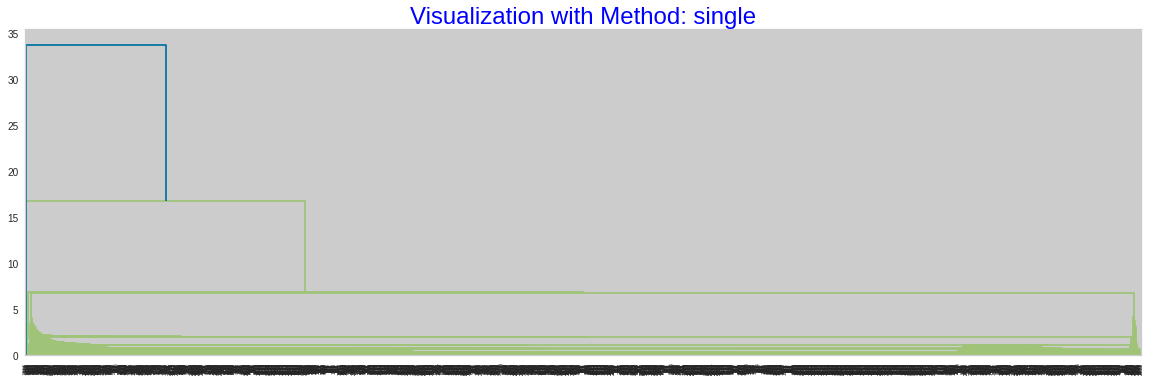

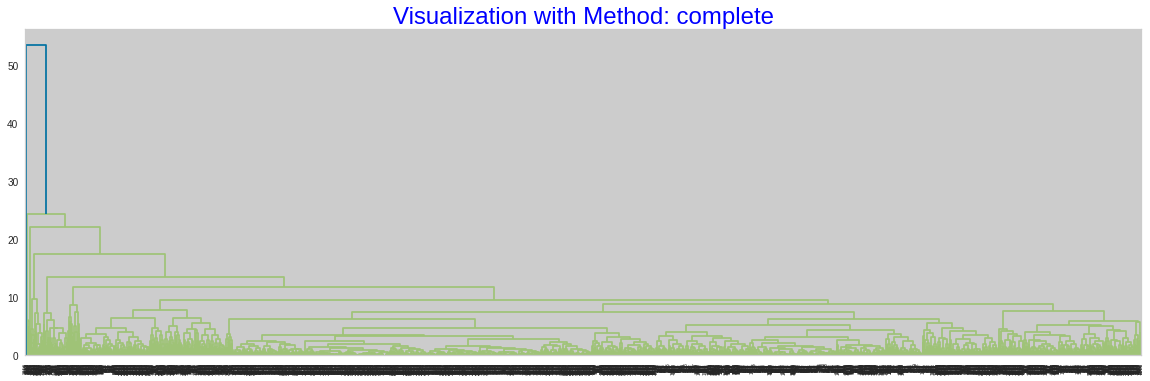

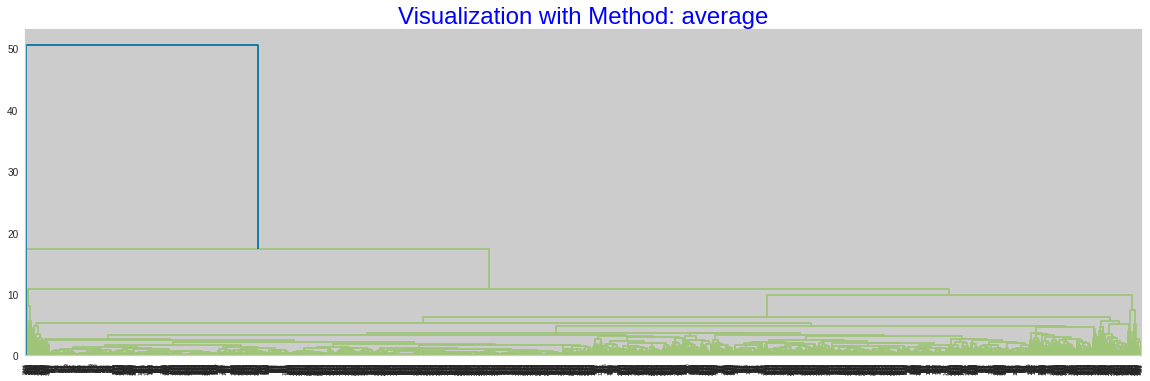

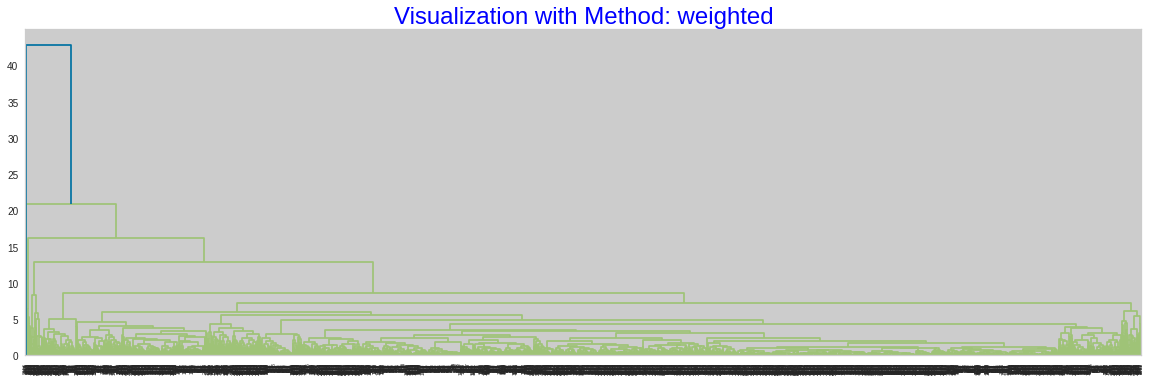

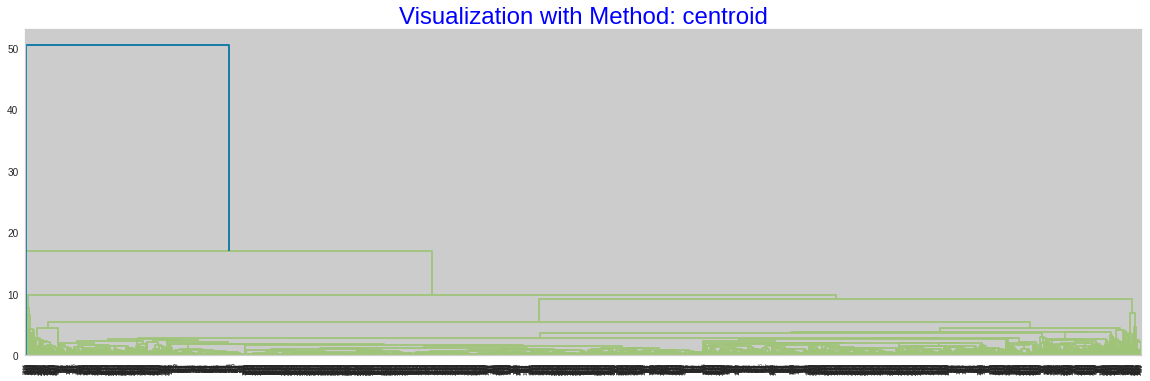

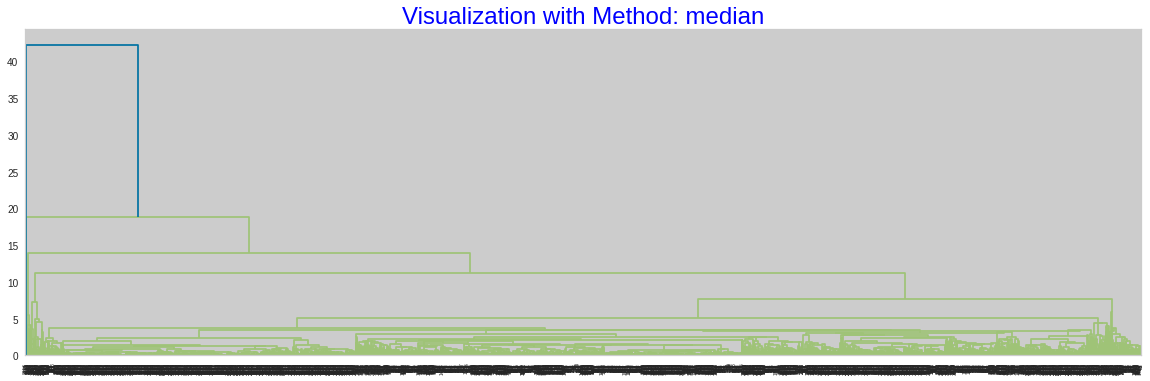

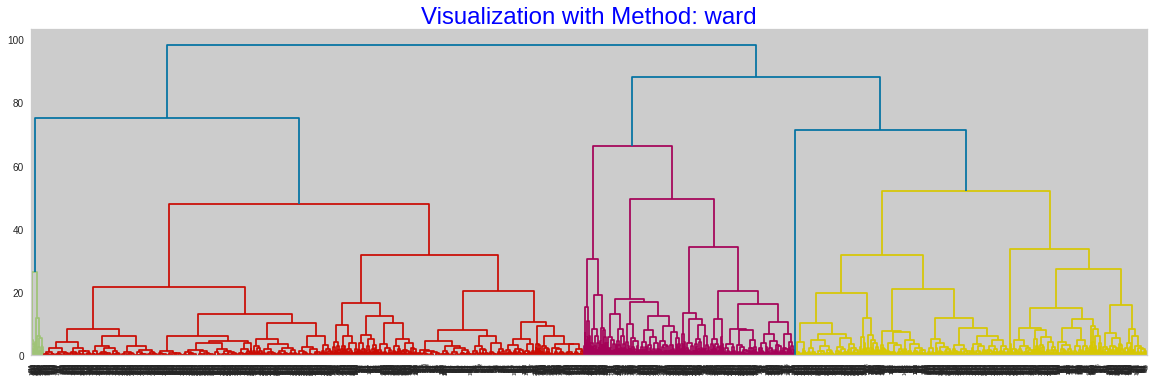

In [128]:
# Hierarchial Clustering with different method:

import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualization with Method: {}'.format(methods),fontdict = dict) 
    Dendrogram1 = shc.dendrogram(shc.linkage(pca_std_airline, method = methods,optimal_ordering=False))


**Portion in the dendogram in which rectangle having maximum height and not crossing any vertical dendogram line is found(left corner blue ones).**
**Observed no. of clusters are 6.**
**Max-Height rectangle is choosen on the basis of max_Euclidean distance to get optimal no. of clusters**

**Agglomerative Clustering**

In [129]:
agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='average')
y_pred_hier = agg_clustering.fit_predict(pca_std_airline)
print(y_pred_hier.shape)
y_pred_hier


(3105,)


array([1, 1, 1, ..., 1, 1, 1])

In [130]:
print("Cluster labels for each point:", agg_clustering.labels_, "\n")
print("Number of leaves in the hierarchical tree:", agg_clustering.n_leaves_, "\n")
print("The estimated number of connected components in the graph:", agg_clustering.n_connected_components_, "\n")
print("The children of each non-leaf node:\n", agg_clustering.children_, "\n")
print("Clustering Score:", (silhouette_score(pca_std_airline, agg_clustering.labels_)*100).round(3))

Cluster labels for each point: [1 1 1 ... 1 1 1] 

Number of leaves in the hierarchical tree: 3105 

The estimated number of connected components in the graph: 1 

The children of each non-leaf node:
 [[2552 2997]
 [ 832  923]
 [2057 2455]
 ...
 [6204 6205]
 [6178 6206]
 [2216 6207]] 

Clustering Score: 64.72


**Cluster Labeling**

In [131]:
# Creating dataframe of cluster labels.
hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [132]:
# Concating model1_Cluster data farme with main dataset copy

hie_airline = pd.concat([airline_final.copy(), hie_cluster], axis=1)
hie_airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Hie_Clustering
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,1.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,1.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,1.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


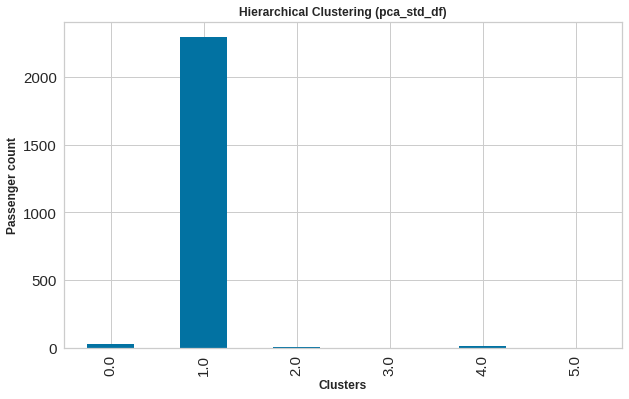

In [133]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_airline.groupby(['Hie_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Balance Labels')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Passenger count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [134]:
hie_airline.groupby(['Hie_Clustering']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Hie_Clustering,,,,,,,,,,
0.0,25,25,25,25,25,25,25,25,25,25
1.0,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295
2.0,2,2,2,2,2,2,2,2,2,2
3.0,1,1,1,1,1,1,1,1,1,1
4.0,14,14,14,14,14,14,14,14,14,14
5.0,1,1,1,1,1,1,1,1,1,1


**By looking at this visualization we can see that all the passengers have been grouped in cluster 1 using hierarchical clustering method**

**K-Means Clustering Method Appliucation**

In [135]:
model1 = KMeans(n_clusters = 6, max_iter=50)
model1.fit(pca_std_airline)

KMeans(max_iter=50, n_clusters=6)

In [136]:
# analysis of clusters formed

airline_final.index = pd.RangeIndex(len(airline_final.index))
airline_km = pd.concat([airline_final,pd.Series(model1.labels_)],axis=1)
airline_km.columns = ["Balance", "Qual_miles", "cc1_miles", "cc2_miles", "cc3_miles", "Bonus_miles", "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll", "ClusterID"]   

In [137]:
airline_km.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
ClusterID            0
dtype: int64

In [138]:
airline_km

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,ClusterID
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,16420,0,1,1,1,0,0,0,0,6942,1
...,...,...,...,...,...,...,...,...,...,...,...
3100,18476,0,1,1,1,8525,4,200,1,1403,0
3101,64385,0,1,1,1,981,5,0,0,1395,0
3102,73597,0,3,1,1,25447,8,0,0,1402,3
3103,54899,0,1,1,1,500,1,500,1,1401,5


In [139]:
airline_final.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,16420,0,1,1,1,0,0,0,0,6942


In [141]:
km_cluster_Balance = pd.DataFrame(airline_km.groupby('ClusterID')['Balance'].mean())
km_cluster_Qual_miles = pd.DataFrame(airline_km.groupby('ClusterID')['Qual_miles'].mean())
km_cluster_cc1_miles = pd.DataFrame(airline_km.groupby('ClusterID')['cc1_miles'].mean())
km_cluster_cc2_miles = pd.DataFrame(airline_km.groupby('ClusterID')['cc2_miles'].mean())
km_cluster_cc3_miles = pd.DataFrame(airline_km.groupby('ClusterID')['cc3_miles'].mean())
km_cluster_Bonus_miles = pd.DataFrame(airline_km.groupby('ClusterID')['Bonus_miles'].mean())
km_cluster_Bonus_trans = pd.DataFrame(airline_km.groupby('ClusterID')['Bonus_trans'].mean())
km_cluster_Flight_miles_12mo = pd.DataFrame(airline_km.groupby('ClusterID')['Flight_miles_12mo'].mean())
km_cluster_Flight_trans_12 = pd.DataFrame(airline_km.groupby('ClusterID')['Flight_trans_12'].mean())
km_cluster_Days_since_enroll = pd.DataFrame(airline_km.groupby('ClusterID')['Days_since_enroll'].mean())


airline_final1 = pd.concat([pd.Series([1,2,3,4,5]),
km_cluster_Balance,
km_cluster_Qual_miles,
km_cluster_cc1_miles,
km_cluster_cc2_miles,
km_cluster_cc3_miles,
km_cluster_Bonus_miles,
km_cluster_Bonus_trans,
km_cluster_Flight_miles_12mo,
km_cluster_Flight_trans_12,
km_cluster_Days_since_enroll],axis=1)
airline_final1.columns = ["ClusterID","Balance", "Qual_miles", "cc1_miles", "cc2_miles", "cc3_miles", "Bonus_miles",  "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll"]
airline_final1.head()

,ClusterID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1.0,26107.500975,48.046784,1.105263,1.000000,1.000000,3014.348928,5.607212,8.572125,0.055556,2089.166667
1,2.0,37115.885749,106.296069,1.160934,1.000000,1.001229,3656.126536,6.353808,6.227273,0.042998,5678.813268
2,3.0,40919.558824,0.000000,1.088235,2.323529,1.000000,12405.235294,14.647059,75.000000,0.382353,3827.235294
3,4.0,76924.088335,90.872027,3.369196,1.000000,1.001133,27676.570781,16.924122,40.406569,0.163080,4426.848245
4,5.0,61474.000000,0.000000,1.000000,1.000000,4.000000,47717.000000,14.000000,0.000000,0.000000,3354.000000


**Cluster Analysis**

<AxesSubplot:xlabel='ClusterID', ylabel='Balance'>

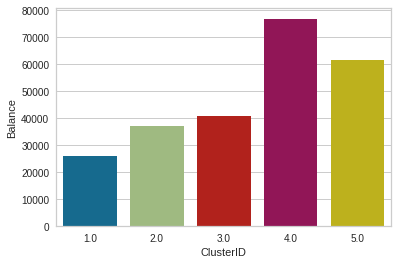

In [142]:
sns.barplot(data=airline_final1,x='ClusterID',y='Balance')

<AxesSubplot:xlabel='ClusterID', ylabel='Qual_miles'>

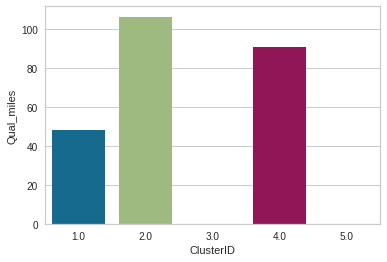

In [143]:
sns.barplot(data=airline_final1,x='ClusterID',y='Qual_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc1_miles'>

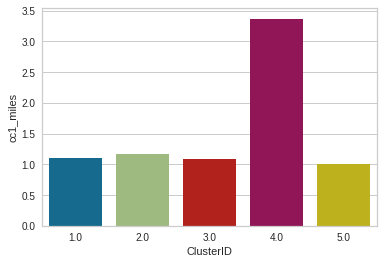

In [145]:
sns.barplot(data=airline_final1,x='ClusterID',y='cc1_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc2_miles'>

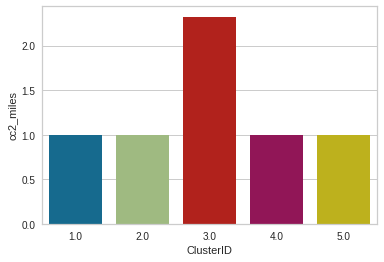

In [146]:
sns.barplot(data=airline_final1,x='ClusterID',y='cc2_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc3_miles'>

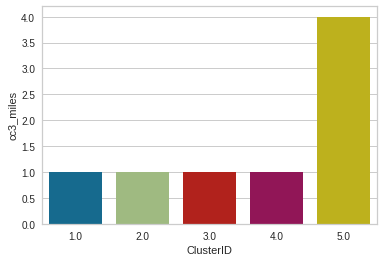

In [147]:
sns.barplot(data=airline_final1,x='ClusterID',y='cc3_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='Bonus_miles'>

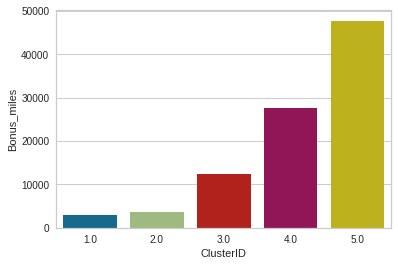

In [148]:
sns.barplot(data=airline_final1,x='ClusterID',y='Bonus_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='Bonus_trans'>

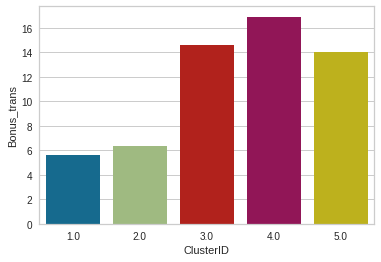

In [150]:
sns.barplot(data=airline_final1,x='ClusterID',y='Bonus_trans')

<AxesSubplot:xlabel='ClusterID', ylabel='Flight_miles_12mo'>

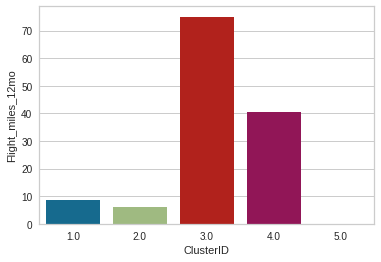

In [149]:
sns.barplot(data=airline_final1,x='ClusterID',y='Flight_miles_12mo')

<AxesSubplot:xlabel='ClusterID', ylabel='Flight_trans_12'>

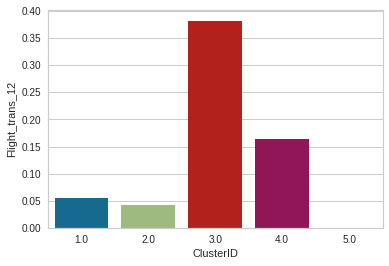

In [151]:
sns.barplot(data=airline_final1,x='ClusterID',y='Flight_trans_12')

<AxesSubplot:xlabel='ClusterID', ylabel='Days_since_enroll'>

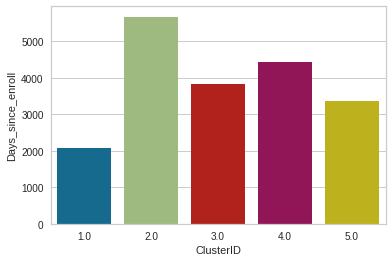

In [152]:
sns.barplot(data=airline_final1,x='ClusterID',y='Days_since_enroll')

In [153]:
model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [154]:
Kmeans_airline = pd.concat([airline_final.copy(), model1_cluster], axis=1)
Kmeans_airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Kmeans_Clustering
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,16420,0,1,1,1,0,0,0,0,6942,1


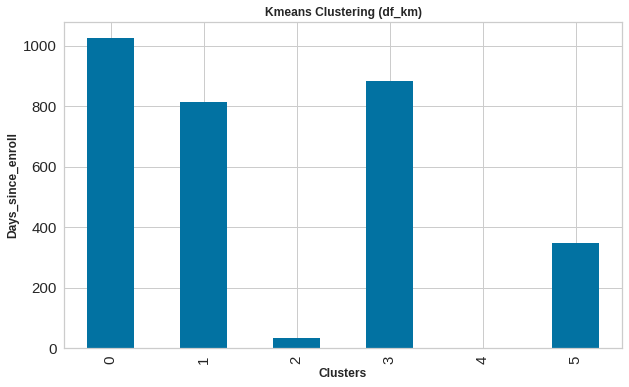

In [155]:
fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_airline.groupby(['Kmeans_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Days_since_enroll')
plt.title('Kmeans Clustering (df_km)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Days_since_enroll', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

**In clusters numbered 0,1,3,5 there are more customers so airlines should focus more on clusters 0, 1, 3 & 5.**

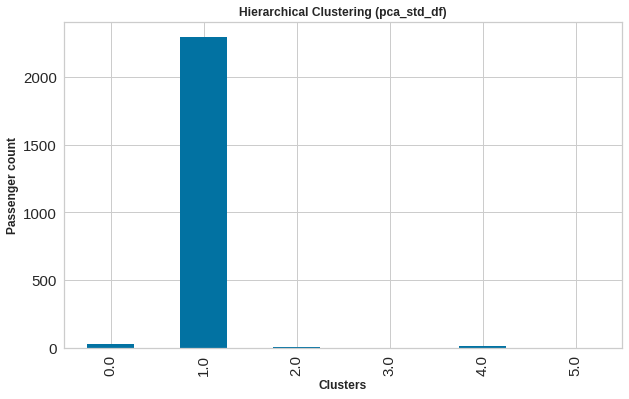

In [156]:
# Comparing this with our Hierarchial Clustering Bar plot:

fig, ax = plt.subplots(figsize=(10, 6))
hie_airline.groupby(['Hie_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Balance Labels')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Passenger count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

**By comparing both the cluster visuals by kmeans & hierarchical K Means is more good in division of clusters.**

In [157]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(Kmeans_airline.loc[Kmeans_airline.Kmeans_Clustering==0].mean(),columns= ['Cluster_1_avg'])
cluster2 = pd.DataFrame(Kmeans_airline.loc[Kmeans_airline.Kmeans_Clustering==1].mean(),columns= ['Cluster_2_avg'])
cluster3 = pd.DataFrame(Kmeans_airline.loc[Kmeans_airline.Kmeans_Clustering==2].mean(),columns= ['Cluster_3_avg'])
cluster4 = pd.DataFrame(Kmeans_airline.loc[Kmeans_airline.Kmeans_Clustering==3].mean(),columns= ['Cluster_4_avg'])
cluster5 = pd.DataFrame(Kmeans_airline.loc[Kmeans_airline.Kmeans_Clustering==4].mean(),columns= ['Cluster_5_avg'])
cluster6 = pd.DataFrame(Kmeans_airline.loc[Kmeans_airline.Kmeans_Clustering==5].mean(),columns= ['Cluster_6_avg'])


In [158]:
avg_airline = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5,cluster6],axis=1)
avg_airline

,Cluster_1_avg,Cluster_2_avg,Cluster_3_avg,Cluster_4_avg,Cluster_5_avg,Cluster_6_avg
Balance,26107.500975,37115.885749,40919.558824,76924.088335,61474.0,62405.308357
Qual_miles,48.046784,106.296069,0.000000,90.872027,0.0,236.910663
cc1_miles,1.105263,1.160934,1.088235,3.369196,1.0,1.608069
cc2_miles,1.000000,1.000000,2.323529,1.000000,1.0,1.000000
cc3_miles,1.000000,1.001229,1.000000,1.001133,4.0,1.000000
Bonus_miles,3014.348928,3656.126536,12405.235294,27676.570781,47717.0,9629.847262
Bonus_trans,5.607212,6.353808,14.647059,16.924122,14.0,9.622478
Flight_miles_12mo,8.572125,6.227273,75.000000,40.406569,0.0,481.086455
Flight_trans_12,0.055556,0.042998,0.382353,0.163080,0.0,1.916427
Days_since_enroll,2089.166667,5678.813268,3827.235294,4426.848245,3354.0,3963.273775


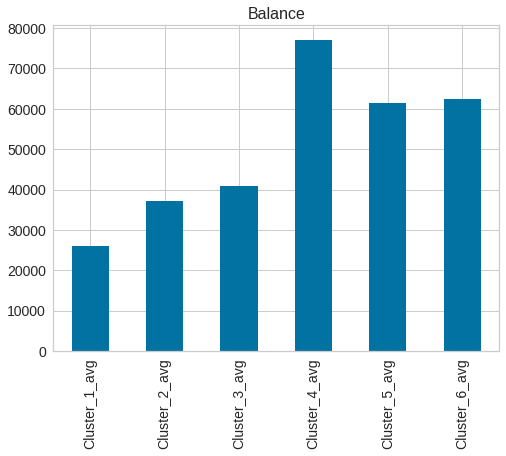

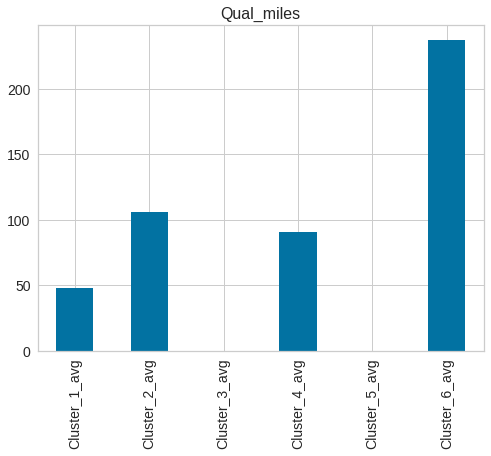

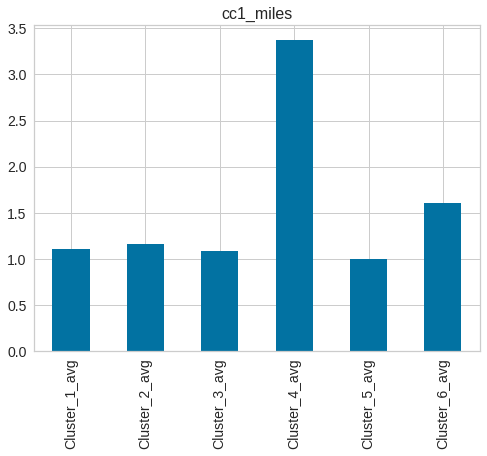

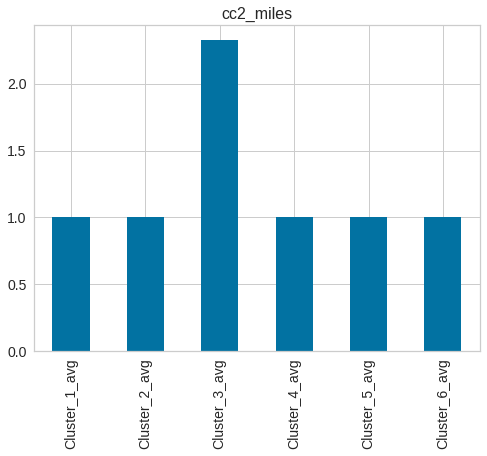

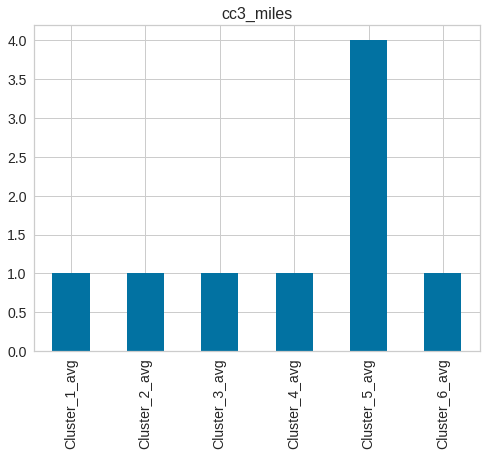

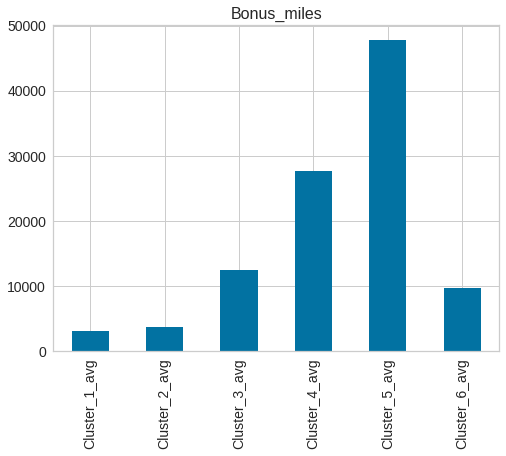

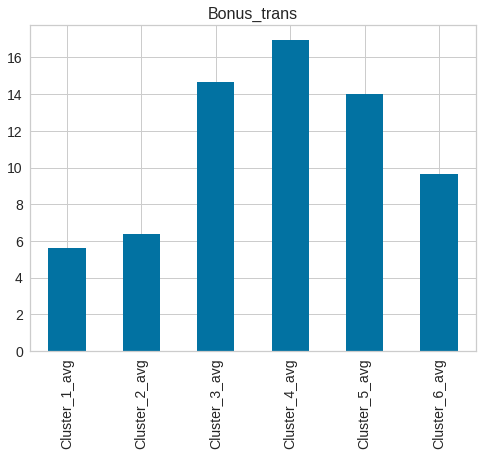

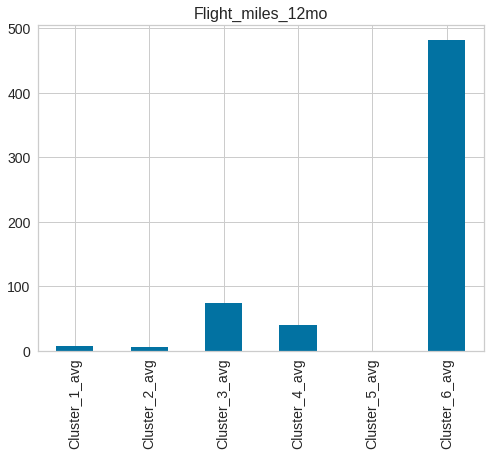

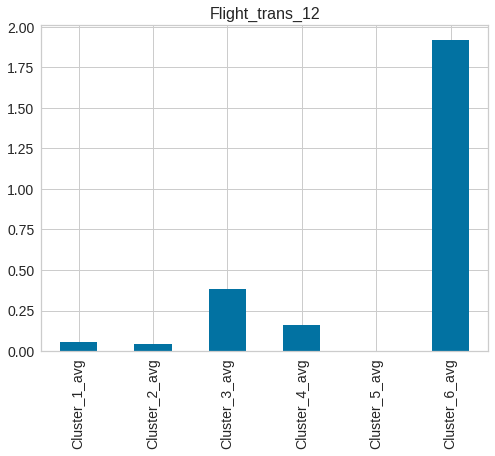

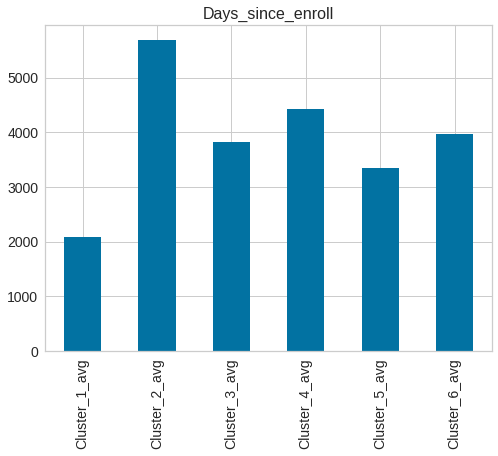

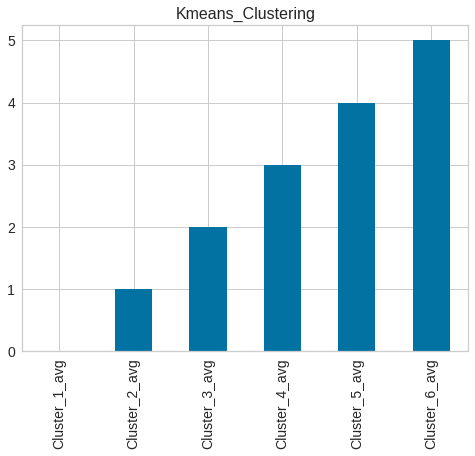

In [160]:
for i , row in avg_airline.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_airline.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

**Balance- Cluster 4 has the highest avg.no of miles eligible to get the free travelling award  & Cluster 1 has the lowest**






**Qual_miles- Cluster 6 has the highest avg.no of miles to qualify for top flight status & Cluster 1 has the lowest miles counted for qualifying**

**Frequent Flyers miles (cc1)-Cluster 4 has the highest avg.no. of miles earned with freq. flyer credit card in the past 
12 month** 

**Rewards Miles (cc2)-Cluster 3 has the highest avg.no. of miles earned with Rewards credit card in the past 12 months.**

**Small Business Miles (cc3)-Cluster 5 has the highest avg.no. of miles earned with Small Business credit card in the past 12 months.**

**Bonus Miles-Cluster 5 has the highest avg.no. of miles earned from non-flight bonus transactions  where as Cluster 1 has the lowest avg.no. of miles earned in the past 12 months.**

**Bonus Transactions-Cluster 4 has the highest avg.no. of non-flight bonus transactions and if we observe here in all the clusters we got good countas somany passengers have used bonus transaction in the past 12 months**

**Flight miles 12mo-Cluster 6 has the highest avg.no. of flight miles in the past 12 months**

**Flight Trans 12-Cluster 6 has the highest avg.no. of flight transactions in the past 12 months**

**Days since Enroll-Cluster 2 has the highest avg.no. customers that have been with airline for longer than other clusters.**